### Udacity - Fundamentos de Data Science I
### Projeto 2 - Investigando um conjunto de dados - Projeto Titanic

###  Descrição

O naufrágio do RMS Titanic é um dos mais conhecidos naufrágios da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou após colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes.

Para tentar responder algumas perguntas, nesta análise será usado um conjunto dados parcial, contendo dados demográficos e informações de 891 dos 2.224 passageiros e tripulantes a bordo do Titanic.

* Inicialmente é feita a importação de bibliotecas úteis e carga do conjunto de dados para um dataframe.

In [34]:
# Importa bibliotecas uteis.
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
% matplotlib inline

# Carrega o arquivo do conjunto de dados para um dataframe.
df = pd.read_csv('titanic-data-6.csv')

# Verifica a importação dos dados.
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [35]:
# Verifica o total de linhas e colunas do dataframe.
print(df.shape)

(891, 12)


* A quatidade de linhas confere com a quantidade de registros esperada no conjunto de dados.

#### Dicionário de dados

Variável | Definição | Chave
-------- | --------- | -----
survival | Sobrevivência | 0 = Não, 1 = Sim
pclass	| Class da passagem | 1 = 1ª Classe, 2 = 2ª Classe, 3 = 3ª Classe
sex	| Sexo |
Age	| Idade em anos |
sibsp | Número de irmãos / cônjuges a bordo do Titanic |
parch | Número de pais / filhos a bordo do Titanic |
ticket | Número da passagem |
fare | Tarifa de embarque |
cabin | Número da cabine |
embarked | Porto de embarque | C = Cherbourg, Q = Queenstown, S = Southampton

### Questionamentos

1. Há algo que sugira que a classe social possa ter realação com a sobrevivência dos passageiros?
2. O local de embarque denota uma possível relação com a classe social dos passageiros?
3. Há alguma indicação de que o desembarque de mulheres e crianças tenha sido prioridade?
4. Qual a média de idade dos sobreviventes das 3 classes sociais indicadas nos dados?
5. Qual o sobrevivente mais idoso?

### Preparação dos dados

* Foi criada uma função auxiliar que será usada algumas vezes ao longo do processo.

In [36]:
# Função que calcula proporção entre dois valores (diferença percentual entre val_1 e val_2).
def proportion(val_1, val_2):
    # Retorna um valor correpondente a diferença percentual entre os valores de entrada.
    return (int(((val_2 / val_1) - 1) * 100))

* Verificou-se uma diferença na quantidade de valores nas colunas Age, Cabin e Embarked.

In [37]:
# Verifica se há valores ausentes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* Os dados ausentes na coluna Age foram preenchido com a média da idade dos demais pessageiros.

In [38]:
# Verifica a idade média do passageiros
age_mean = round(df.query('Age.notnull()', engine='python')['Age'].mean())
age_mean

30

In [39]:
# Substitui os dados de idades ausentes pela média de idade
df['Age'].fillna(age_mean, inplace=True)

# Confere se a alteração foi feita com sucesso. Retorna 'False' se bem sucedida.
df['Age'].isnull().values.any()

False

* Os dados ausentes na coluna Cabin foram preenchidos com 'unknown'.

In [40]:
# Verifica a quantidade dados de cabines ausentes.
df['Cabin'].isnull().sum()

687

In [41]:
# Substitui os dados de cabine ausentes pela string ´unknown´.
df['Cabin'].fillna('unknown', inplace=True)

# Confere se a alteração foi feita com sucesso. Retorna 'False' se bem sucedida.
df['Cabin'].isnull().values.any()

False

In [42]:
# Verifica a quantidade dados de embarque ausentes.
df['Embarked'].isnull().sum()

2

In [43]:
# Substitui os dados de embarque pela string ´unknown´.
df['Embarked'].fillna('unknown', inplace=True)

# Confere se a alteração foi feita com sucesso. Retorna 'False' se bem sucedida.
df['Embarked'].isnull().values.any()

False

* O tipo de dado da coluna Age é 'float64' devido a forma como representaram idades fracionárias.

In [44]:
# Verifica se ainda há valores ausentes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* Foi efetuada a mudança do tipo para 'int64' para adequar aos propósitos dessa análise.

In [45]:
# Muda o tipo de dado da coluna idade para inteiro.
df.Age = df.Age.astype(np.int64)

In [46]:
# Verifica a mudança.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 83.6+ KB


* O dataframe agora tem a mesma quantidade linhas e valores para todas as variáveis.

### Exploração dos dados

* Após uma observação inicial do dataframe iniciou-se a busca pelas respostas para as questões apresentadas.

In [47]:
# Quantidade de linhas a exibir
qty_lin = 5

# Lista dataframe para observação.
df.head(qty_lin)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,unknown,S


In [48]:
df.tail(qty_lin)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30,1,2,W./C. 6607,23.45,unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,unknown,Q


### Questão 1

#### Há algo que sugira que a classe social possa ter realação com a sobrevivência dos passageiros?

* Primeiro verificou-se a quantidade total de passageiros.

In [49]:
# Verifica quantidade total de passageiros por classe social.
passenger_class_qty = df['Pclass'].value_counts()
passenger_1 = passenger_class_qty[1]
passenger_2 = passenger_class_qty[2]
passenger_3 = passenger_class_qty[3]
print(passenger_class_qty)

3    491
1    216
2    184
Name: Pclass, dtype: int64


* Depois a quantidade de passageiros sobreviventes em cada classe.

In [50]:
# Verifica quantidade de passageiros sobreviventes por classe social.
survived_class_qty = df.groupby('Pclass')['Survived'].sum()
survived_1 = survived_class_qty[1]
survived_2 = survived_class_qty[2]
survived_3 = survived_class_qty[3]
print(survived_class_qty)

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


* Com as quantidades encontradas calculou-se a proporção de passageiros sobreviventes em cada classe.

Sobreviventes por classe

1ª Classe: 63%
2ª Classe: 48%
3ª Classe: 25%


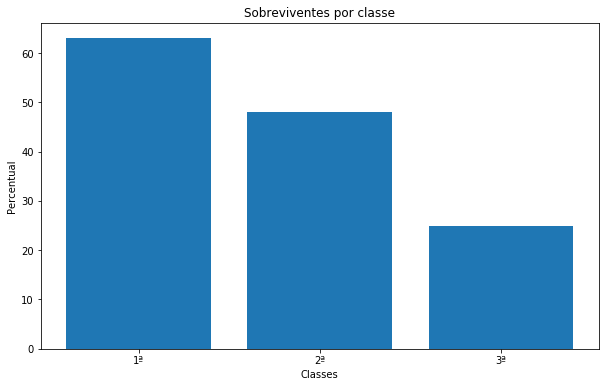

In [51]:
# Calcula proporção de sobreviventes por classe.
survived_1class_proportion = 100 + proportion(passenger_1, survived_1)
survived_2class_proportion = 100 + proportion(passenger_2, survived_2)
survived_3class_proportion = 100 + proportion(passenger_3, survived_3)

# Exibe os valores
print('Sobreviventes por classe\n')
print('1ª Classe: {}%'.format(survived_1class_proportion))
print('2ª Classe: {}%'.format(survived_2class_proportion))
print('3ª Classe: {}%'.format(survived_3class_proportion))

# Traça o gráfico
class_surv_prop = {u'1ª':survived_1class_proportion, u'2ª': survived_2class_proportion, u'3ª':survived_3class_proportion}
fig = plt.subplots(figsize=(10,6))
plt.bar(range(len(class_surv_prop)), class_surv_prop.values(), align='center')
plt.title('Sobreviventes por classe')
plt.xlabel('Classes')
plt.ylabel('Percentual')
plt.rcParams['font.size'] = 9
plt.xticks(range(len(class_surv_prop)), class_surv_prop.keys());

##### Resposta:

* Os dados apontam possivelmente houve um maior número de sobreviventes na primeira classe.

-------------------

### Questão 2

#### O local de embarque denota uma possível relação com a classe social dos passageiros?

* Primeiro foi preciso agrupar os dados por porto de embarque e classe a qual os passageiros pertenciam.

In [52]:
# Verifica quantidade de passageiros embarcados em cada porto, por classe social.
# C = Cherbourg / Q = Queenstown / S = Southampton
embarked_class_qty = df.groupby('Embarked')['Pclass'].value_counts()
print('Total de passageiros por porto e classe\n',embarked_class_qty, '\n')

total_passenger_class = df['Pclass'].value_counts()
print('Total de passageiros por classe\n', total_passenger_class)

Total de passageiros por porto e classe
 Embarked  Pclass
C         1          85
          3          66
          2          17
Q         3          72
          2           3
          1           2
S         3         353
          2         164
          1         127
unknown   1           2
Name: Pclass, dtype: int64 

Total de passageiros por classe
 3    491
1    216
2    184
Name: Pclass, dtype: int64


* Depois foi gerado um array com dados sobre quantidade por classe para ser usado na representação de cada gráfico.

In [53]:
# Cria os arrays com os valores de local de embarque com a série criada durante a análise.
cherbourg_qty = embarked_class_qty['C']
queenstown_qty = embarked_class_qty['Q']
southampton_qty = embarked_class_qty['S']

# Ordena por arrays dos locais por classe.
cherbourg_qty = cherbourg_qty.sort_index()
queenstown_qty = queenstown_qty.sort_index()
southampton_qty = southampton_qty.sort_index()
total_passenger_class = total_passenger_class.sort_index()

# Prepara as listas de array para alimentar o gráfico
class1_data = [100 - (- proportion(total_passenger_class[1], cherbourg_qty[1])),
               100 - (- proportion(total_passenger_class[1], queenstown_qty[1])),
               100 - (- proportion(total_passenger_class[1], southampton_qty[1]))]

class2_data = [100 - (- proportion(total_passenger_class[2], cherbourg_qty[2])),
               100 - (- proportion(total_passenger_class[2], queenstown_qty[2])),
               100 - (- proportion(total_passenger_class[2], southampton_qty[2]))]

class3_data = [100 - (- proportion(total_passenger_class[3], cherbourg_qty[3])),
               100 - (- proportion(total_passenger_class[3], queenstown_qty[3])),
               100 - (- proportion(total_passenger_class[3], southampton_qty[3]))]

* Com as listas com dados de cada classe preparadas o gráfico é configurado.

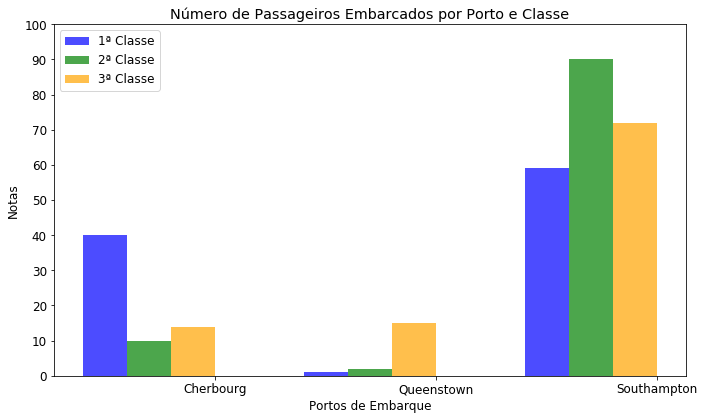

In [66]:
# Cria o gráfico
groups = 3
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(groups)
bar_width = 0.2
transp = 0.7
plt.bar(index, class1_data, bar_width, alpha=transp, color='blue', label='1ª Classe')
plt.bar(index + 0.2, class2_data, bar_width, alpha=transp, color='green', label='2ª Classe')
plt.bar(index + 0.4, class3_data, bar_width, alpha=transp, color='orange', label='3ª Classe')
plt.xlabel('Portos de Embarque')
plt.ylabel('Notas')
plt.title('Número de Passageiros Embarcados por Porto e Classe')
plt.xticks(index + 0.5, ('Cherbourg', 'Queenstown', 'Southampton'))
plt.yticks(np.arange(0, 110, 10))
plt.rcParams['font.size'] = 12
plt.legend()
plt.tight_layout()
plt.show()

#### Resposta

* Os dados denotam que possivelmente a o maior parte dos passageiros tenha embarcado em Southampton, mas cerca de 40% da primeira classe tenha embarcado também em Cherbourg. Em Queenstown a maior parte do passageiros a embarcar foram os da terceira classe.

-----------------

### Questão 3

#### Há alguma indicação de que o desembarque de mulheres e crianças tenha sido prioridade?

* Primeiro foi feita uma seleção de dados entre gêneros feminino e masculino, ordenada por idade, com as respectivas quantidades verificadas para cada idade.

In [67]:
## Cria dataframes com quantidade de passageiros sobreviventes por gênero e idade.
df_temp = df.query('Survived == "1" & Sex == "female"')['Age'].value_counts()
df_survived_female = pd.DataFrame(df_temp.reset_index())
df_survived_female.columns = ['age', 'num']
df_survived_female = df_survived_female.sort_values(['age'])
df_survived_female = df_survived_female.reset_index(drop=True)
print('Gênero feminino quantidade por idade\n',df_survived_female.head(),'\n')

df_temp = df.query('Survived == "1" & Sex == "male"')['Age'].value_counts()
df_survived_male = pd.DataFrame(df_temp.reset_index())
df_survived_male.columns = ['age', 'num']
df_survived_male = df_survived_male.sort_values(['age'])
df_survived_male = df_survived_male.reset_index(drop=True)
print('Gênero masculino quantidade por idade\n', df_survived_male.head())

Gênero feminino quantidade por idade
    age  num
0    0    2
1    1    2
2    2    2
3    3    1
4    4    5 

Gênero masculino quantidade por idade
    age  num
0    0    5
1    1    3
2    2    1
3    3    4
4    4    2


* Com a seleção gerou-se um gráfico de barras de sobreviventes por idade de ambos os gêneros.

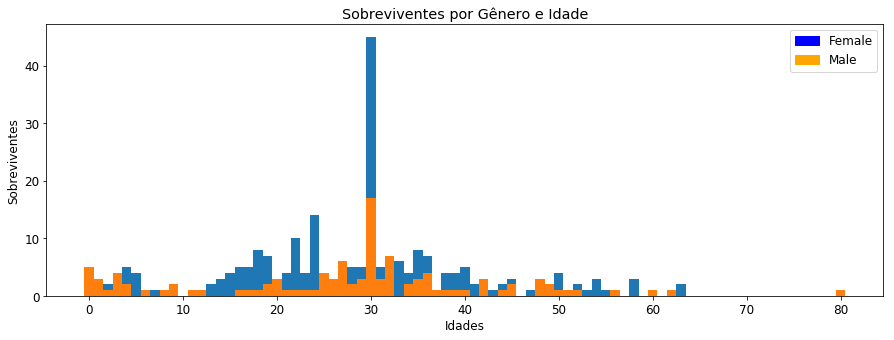

In [68]:
# Configura parâmetros do gráfico
width = 1
female = mpatches.Patch(color='blue', label='Female')
male = mpatches.Patch(color='orange', label='Male')
fig, barf = plt.subplots(figsize=(15,5))

# Cria gráfico com os dataframes de sobreviventes por gênero e idade criados durante a análise.
barf.bar(df_survived_female['age'], df_survived_female['num'], width)
barf.legend(handles=[female, male], loc=1)
barf.set_title('Sobreviventes por Gênero e Idade')
barf.set_xlabel('Idades')
barf.set_ylabel('Sobreviventes');
barf.bar(df_survived_male['age'], df_survived_male['num'], width)
plt.rcParams['font.size'] = 12
plt.show();

* Limitação: o grande número de mulheres com 30 anos aqui se deve a atribuição da média de idade aos valores de idade ausentes e por haverem muitos valores de idade do gênero feminino ausentes.

#### Resposta

* Os dados examinados possivelmente sinalizam que a diferença entre o número de sobreviventes é menor para ambos os gêneros nas idades aproximadamente abaixo de 13 anos. Após essa idade a diferença aumenta a favor do gênero feminino. Sugerindo uma possível priorização para crianças e mulheres.

-----------------

### Questão 4

#### Qual a média de idade dos sobreviventes das 3 classes sociais indicadas nos dados?

* Foi criada uma lista com uma seleção dos sobreviventes por classe e média de idade.

In [57]:
# Verifica a média de idade dos passageiros sobreviventes nas três classes sociais.
df_survived_class_age =[]
df_survived_class_age.append(round(df.query('Survived == "1" & Pclass == "1"')['Age'].mean()))
df_survived_class_age.append(round(df.query('Survived == "1" & Pclass == "2"')['Age'].mean()))
df_survived_class_age.append(round(df.query('Survived == "1" & Pclass == "3"')['Age'].mean()))
print('1ª, 2ª e 3ª classes: ', df_survived_class_age)

1ª, 2ª e 3ª classes:  [35, 26, 23]


* A lista alimenta o gráfico de idades por classe.

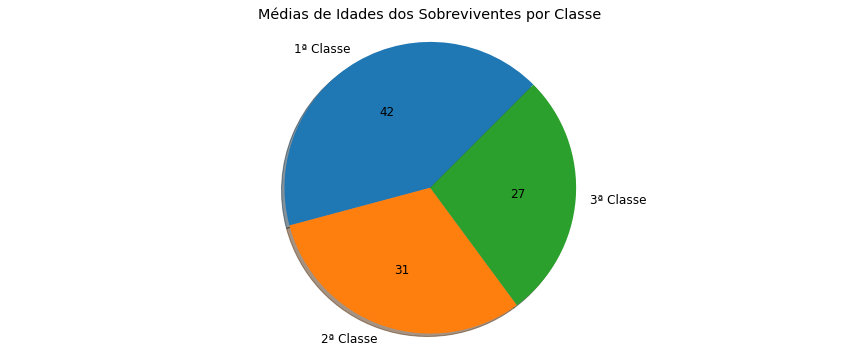

In [65]:
# Configura parâmetros do gráfico
labels = '1ª Classe', '2ª Classe', '3ª Classe'
explode = (0, 0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(15,6))

# Cria gráfico com as lsitas de idade por classe criadas durante a análise.
ax1.pie(df_survived_class_age, labels=labels, autopct='%.0f', shadow=True, startangle=45)
ax1.axis('equal')
ax1.set_title('Médias de Idades dos Sobreviventes por Classe')
plt.rcParams['font.size'] = 12
plt.show()

#### Resposta

* As seguintes médias de idade foram sugeridas pelos dados analisados: 1ª Classe 42 anos, 2ª Classe 31 anos e 3ª Classe 27 anos.

-------------

### Questão 5

#### Qual o sobrevivente mais idoso?

* Após realizar uma seleção de passageiros sobreviventes, com uma função separou-se o registro do passageiro de maior idade.

In [59]:
# Cria dataframe com sobreviventes
df_passengers = df.query('Survived == "1"')
# Separa passageiro sobrevivente com maior idade.
passenger_old = df_passengers.loc[df_passengers['Age'].idxmax()]
print("Sobrevivente: ", passenger_old['Name'], '\nIdade       : ',
      passenger_old['Age'], 'anos', '\nClasse      : ', str(passenger_old['Pclass']) + 'ª Classe')

Sobrevivente:  Barkworth, Mr. Algernon Henry Wilson 
Idade       :  80 anos 
Classe      :  1ª Classe


#### Resposta

* Os dados utilizados apontam como possível sobrevivente mais idoso o Sr. Algernon Henry Wilson Barkworth, 80 anos, que viajava na primeira classe.

--------------------

### Conclusão


A análise dos dados sugere de que o tipo de bilhete adquirido possa ter significativa influencia na questão de sobrevivência.
Somente 1/4 dos passageiros da terceira classe sobreviveram, enquanto quase metade dos passageiros da segunda classe sobreviveu e mais da metade dos da primeira classe.

Considerando a influencia da classe na sobrevivência ao naufrágio, surge o questionamento quanto a origem de partida dos passageiros de cada classe. Onde Southampton aparece como sendo a origem da maioria dos passageiros, embora cerca de 40% da primeira classe tenha embarcado também em Cherbourg.

Aparentemente foi respeitado a ordem de desembarque de primeiro mulheres e crianças. Tendo a média de idade dos passageiros sobreviventes da primeira classe ficado um pouco acima das demais classes. E o passageiro sobrevivente mais idoso, com 80 anos, viajava na primeira classe.



#### Limitações
As conclusões são baseadas nos dados parciais retirados do site Kaggle, portanto podem não estar totalmente de acordo com os fatos reais.

#### Fontes de consulta
* Wikipédia - https://pt.wikipedia.org/wiki/RMS_Titanic
* Kaggle - https://www.kaggle.com/c/titanic/data
* Udacity - aulas da Nanodegree Fundamentos de Data Science I
* Python - https://www.python.org/
* Pandas - https://pandas.pydata.org/
* Matplotlib - https://matplotlib.org/
* Stack Overflow - https://stackoverflow.com/